In [4]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the Fashion MNIST dataset
import pandas as pd

train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')
train


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
y_train

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 16))
j = 1

for i in np.random.randint(0, len(X_train), 25):
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="Greys")
    plt.axis('off')
    plt.title(f'{y_train.iloc[i]}')

plt.show()



In [6]:
# 2. Preprocess the data
# Reshape data to include a single channel (grayscale)
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    
])


# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')



Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.6801 - loss: 0.8787 - val_accuracy: 0.8552 - val_loss: 0.4039
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8359 - loss: 0.4510 - val_accuracy: 0.8781 - val_loss: 0.3453
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8566 - loss: 0.3897 - val_accuracy: 0.8847 - val_loss: 0.3165
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.8713 - loss: 0.3527 - val_accuracy: 0.8867 - val_loss: 0.3043
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8773 - loss: 0.3334 - val_accuracy: 0.8954 - val_loss: 0.2831
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8860 - loss: 0.3085 - val_accuracy: 0.8982 - val_loss: 0.2761
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.8957 - loss: 0.2874 - val_accuracy: 0.9052 - val_loss: 0.2626
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8952 - loss: 0.2811 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


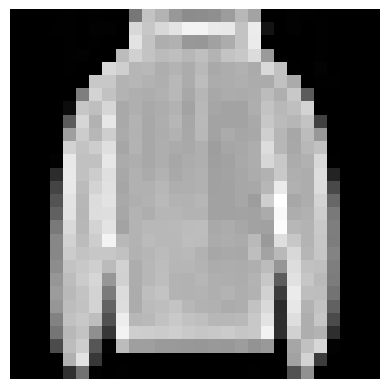

Prediction: pullover


In [8]:
import matplotlib.pyplot as plt
import random
fashion = ['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

n = random.randint(0, len(X_test) - 1)
predicted_value = model.predict(X_test)

# Display the image
plt.imshow(X_test[n].squeeze(), cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Get the predicted label
pred = predicted_value[n].argmax()
pred
print('Prediction:', fashion[pred])

In [ ]:
plt.figure(figsize=(16, 16))
j = 1
predicted_value = model.predict(X_test)

for i in np.random.randint(0, len(X_test), 25):
    pred = predicted_value[i].argmax()
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(X_test[i], cmap="Greys")
    plt.axis('off')
    plt.title(f'{fashion[pred]}')

plt.show()